In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os, os.path

In [2]:
whites =pd.read_csv('white_wines_clean.csv', sep=';', header=0, encoding='iso8859_2')
reds =pd.read_csv('red_wines_clean.csv', sep=';', header=0, encoding='iso8859_2')


reds['rw'] = 'red'
whites['rw'] = 'white'

df = pd.concat([bianchi, rossi])

df['idname'] = df.name + ' - ' + df.company

df = df.set_index('idname')

df.dropna(inplace=True)

df.head()

,company,name,avg_review,num_review,price,food_advice,country,region,wine_type,year,legg_strutt,secco_dolce,piatto_acid,notes,rw
idname,,,,,,,,,,,,,,,
Dolée - Vie di Romans,Vie di Romans,Dolée,4.2,31,36.00,Pasta / Frutti di mare / Formaggio a pasta dur...,Italia,Friuli Isonzo,Friulano,2008.0,64.4267,26.4338,51.6989,albero da frutta/agrume/legno,white
Ciampagnis Chardonnay - Vie di Romans,Vie di Romans,Ciampagnis Chardonnay,4.1,38,21.15,Pasta / Frutti di mare / Formaggio a pasta dur...,Italia,Friuli Isonzo,Chardonnay,2020.0,62.6386,25.1236,51.0969,legno/albero da frutta/agrume,white
Vermentino - Fattoria Sardi,Fattoria Sardi,Vermentino,3.9,46,12.00,Pasta / Vegetariano / Antipasti e spuntini,Italia,Colline Lucchesi,Vermentino,2019.0,39.3159,24.7480,66.3812,albero da frutta/agrume/Erbaceo,white
Vernaccia di San Gimignano Blanco - Panizzi,Panizzi,Vernaccia di San Gimignano Blanco,3.8,400,9.90,Pasta / Vegetariano / Antipasti e spuntini,Italia,Vernaccia di San Gimignano,Vernaccia di San Gimignano,2018.0,43.9714,18.4180,66.2523,albero da frutta/agrume/Erbaceo,white
Pandataria - Candidaterra,Candidaterra,Pandataria,3.8,58,27.90,Pasta / Vegetariano / Antipasti e spuntini,Italia,Lazio,Falanghina,2018.0,50.3706,22.4478,42.7289,Erbaceo/nota tropicale,white


filter_structs = {
    'red' : {
        'legg_strutt' : {
            'leggero': [0, 50],
            'medio' : [50, 60],
            'strutturato': [60, 100]
        },
        'secco_dolce': {
            'secco' : [0, 45],
            'medio' : [45, 60],
            'dolce' : [60, 100]
        },
        'piatto_acid' : {
            'piatto' :  [0, 20],
            'medio': [20, 40],
            'acidulo' : [40, 100]
        }
        
    },
    'white' : {
        'legg_strutt' : {
            'leggero': [0, 50],
            'medio' : [50, 60],
            'strutturato': [60, 100]
        },
        'secco_dolce': {
            'secco' : [0, 45],
            'medio' : [45, 60],
            'dolce' : [60, 100]
        },
        'piatto_acid' : {
            'piatto' :  [0, 20],
            'medio': [20, 40],
            'acidulo' : [40, 100]
}
            

In [6]:
naive_filter = {
    'red' : {
        'legg_strutt' : {
            'leggero': [0, 40],
            'medio' : [40, 60],
            'strutturato': [60, 100]
        },
        'secco_dolce': {
            'secco' : [0, 40],
            'medio' : [40, 60],
            'dolce' : [60, 100]
        },
        'piatto_acid' : {
            'piatto' :  [0, 40],
            'medio': [40, 60],
            'acidulo' : [60, 100]
        }
        
    },
    'white' : {
        'legg_strutt' : {
            'leggero': [0, 40],
            'medio' : [40, 60],
            'strutturato': [60, 100]
        },
        'secco_dolce': {
            'secco' : [0, 40],
            'medio' : [40, 60],
            'dolce' : [60, 100]
        },
        'piatto_acid' : {
            'piatto' :  [0, 40],
            'medio': [40, 60],
            'acidulo' : [60, 100]     
        }
    }
}
            

In [7]:
def filter_wines(wtype, min_price='indifferente', max_price='indifferente', foods=[], 
                 legg_strutt='indifferente', secco_dolce='indifferente', piatto_acid='indifferente',
                 wines = df, filter_type = naive_filter):
    
    wines = wines[wines.rw==wtype]
    if min_price != 'indifferente':
        wines = wines[wines.price>=float(min_price)]
    if max_price != 'indifferente':
        wines = wines[wines.price<=float(max_price)]
    for food in foods:
        col = []
        for row in wines.food_advice.to_list():
            if food in row:
                col.append(True)
            else:
                col.append(False)
        wines = wines[col]
    if legg_strutt != 'indifferente':
        s_range = filter_type[wtype]['legg_strutt'][legg_strutt]
        wines = wines[np.logical_and(wines.legg_strutt>=s_range[0], wines.legg_strutt<=s_range[1])]
        
    if secco_dolce != 'indifferente':
        s_range = filter_type[wtype]['secco_dolce'][secco_dolce]
        wines = wines[np.logical_and(wines.secco_dolce>=s_range[0], wines.secco_dolce<=s_range[1])]
       
    if piatto_acid != 'indifferente':
        s_range = filter_type[wtype]['piatto_acid'][piatto_acid]
        wines = wines[np.logical_and(wines.piatto_acid>=s_range[0], wines.piatto_acid<=s_range[1])]
        
    wines['score'] = wines['avg_review'] * (np.log10(wines['num_review']))

    wines = wines.sort_values(by='score', ascending=False)

    print('Company name: ', str(wines['company'].iloc[0]))
    print('Wine name: ', str(wines['name'].iloc[0] + wines['year'].iloc[0]))
    print('Price: ', str(wines['price'].iloc[0]) + '€')

    input_name = 'C:\\Users\\rikk-\\PycharmProjects\\Progettone\\img_all'
    
    imgs = []

    for f in os.listdir(input_name):
        imgs.append(Image.open(os.path.join(input_name,f)))

    filenames = []

    for f in os.listdir(input_name):
        ext = str(os.path.splitext(f)[0])
        filenames.append(ext)

    if str(wines['name'].iloc[0] + wines['year'].iloc[0] + '\'') in filenames:
        return imgs[filenames.index(str(wines['name'].iloc[0] + wines['year'].iloc[0] + '\''))]
    

Company name:  Tommasi
Wine name:  Amarone della Valpolicella Classico 2015
Price:  56.3€


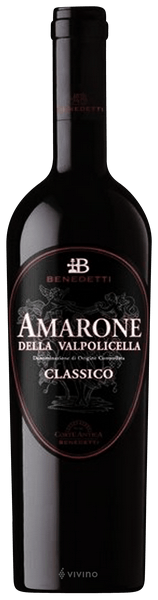

In [9]:
wtype = 'red'
min_price = 50
max_price = 200
foods = ['Manzo']

legg_strutt = ['leggero', 'medio', 'strutturato', 'indifferente'][2]

secco_dolce = ['secco', 'medio', 'dolce', 'indifferente'][0]

piatto_acid = ['piatto', 'medio', 'acidulo', 'indifferente'][1]

filter_wines(wtype=wtype, min_price=min_price, max_price=max_price, 
                 foods=foods, legg_strutt=legg_strutt, secco_dolce=secco_dolce, piatto_acid=piatto_acid)